# The Future Orientation Index (FOI)

The Future Orientation Index was introduced by Tobias Preis, Helen Susannah Moat, H. Eugene Stanley and Steven Bishop using Google Trends to demonstrate that Google users from countries with a higher per capita GDP are more likely to search for information about the future than information about the past.[[1]](https://www.nature.com/articles/srep00350) 

The findings suggest there may be a link between online behaviour and real-world economic indicators. The authors of the study examined Google query logs made by Google users in 45 different countries in 2010 and calculated the ratio of the volume of searches for the coming year (‘2011’) to the volume of searches for the previous year (‘2009’).


In [1]:
import sys
sys.path.append("../libs")

%load_ext autoreload
%autoreload 2

import utils
import vis

## Constants

In [2]:
YEAR = 2010 # 2014
FN_GOOGLE_TRENDS = f'../../data/geoMap_{YEAR}.csv'
FN_WB_GDP = '../../data/WITS-Country-Timeseries.xlsx'
COUNTRIES_EXAMPLE = ['Germany','Austria','Ecuador']
COUNTRIES = ['Canada','France','Germany','Italy','Japan','Russia','United Kingdom','United States']
COUNTRIES_EXAMPLE2 = ['Luxembourg','Switzerland','Norway']
SAMPLE_SIZE_PAPER = 45
RANDOM_STATE = 1

## Loading Data

In [3]:
### Google Trends
df_gt = utils.read_csv(FN_GOOGLE_TRENDS, header=1, index_col=0)
df_gt.rename(columns={f'{YEAR-1}: ({YEAR})':YEAR-1, f'{YEAR+1}: ({YEAR})':YEAR+1}, inplace=True)
df_gt.loc[:,YEAR-1] = df_gt.loc[:,YEAR-1].apply(lambda v: str(v).replace('%','').strip().replace('nan','0')).astype(float)
df_gt.loc[:,YEAR+1] = df_gt.loc[:,YEAR+1].apply(lambda v: str(v).replace('%','').strip().replace('nan','0')).astype(float)
df_gt.fillna(0, inplace=True)

## Calculating FOI
df_gt.loc[:,f'FOI_{YEAR}'] = df_gt.apply(lambda r: r[YEAR+1]/r[YEAR-1], axis=1)
df_gt.head()

/tmp/ipykernel_3639418/2590534110.py:9: RuntimeWarning: invalid value encountered in double_scalars
  df_gt.loc[:,f'FOI_{YEAR}'] = df_gt.apply(lambda r: r[YEAR+1]/r[YEAR-1], axis=1)


,2009,2011,FOI_2010
Country,,,
Morocco,79.0,21.0,0.265823
Vietnam,80.0,20.0,0.250000
Tanzania,77.0,23.0,0.298701
Niger,59.0,41.0,0.694915
Egypt,59.0,41.0,0.694915


In [4]:
### GDP per capita
df_gdp = utils.read_xlsx(FN_WB_GDP, sheet_name='Country-Timeseries')
df_gdp = df_gdp.set_index('Country Name')[[str(YEAR)]]
df_gdp.rename(columns={str(YEAR):f'GDP_{YEAR}'}, inplace=True)
df_gdp.rename(index={'Russian Federation':'Russia'}, inplace=True)
df_gdp.head()

,GDP_2010
Country Name,
Afghanistan,569.282354
Albania,3577.114334
Algeria,3931.720046
Andorra,40937.274068
Angola,2992.992925


## Combining data

In [5]:
df_join = df_gdp.join(df_gt[f'FOI_{YEAR}'])
df_join = df_join.dropna()
df_join.head()

,GDP_2010,FOI_2010
Country Name,,
Afghanistan,569.282354,1.127660
Albania,3577.114334,0.351351
Algeria,3931.720046,0.538462
Andorra,40937.274068,1.173913
Angola,2992.992925,0.785714


### Samples

In [6]:
df_join.loc[COUNTRIES_EXAMPLE,:].round(2)

,GDP_2010,FOI_2010
Country Name,,
Germany,37760.91,1.17
Austria,43334.51,1.17
Ecuador,5331.38,0.59


In [7]:
df_gt.loc[COUNTRIES_EXAMPLE,:].round(2)

,2009,2011,FOI_2010
Country,,,
Germany,46.0,54.0,1.17
Austria,46.0,54.0,1.17
Ecuador,63.0,37.0,0.59


## Plots

### All countries

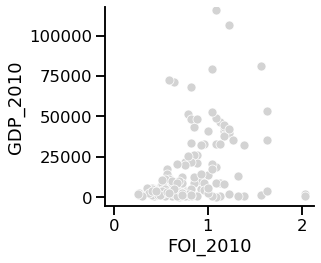

In [8]:
# all countries
vis.set_style(context='talk')
vis.plot_correlation(df=df_join, 
                     corr=False,
                     y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate)

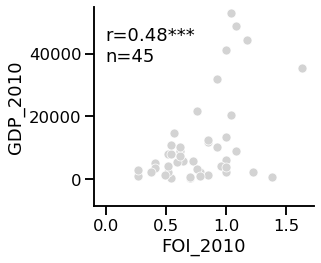

In [9]:
# correlation
vis.set_style(context='talk')
vis.plot_correlation(df=df_join.sample(SAMPLE_SIZE_PAPER, random_state=RANDOM_STATE), 
                     corr=True,
                     reg=False,
                     y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate)

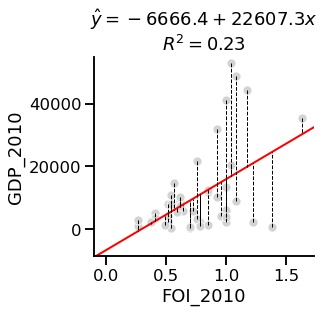

In [10]:
# regression
vis.set_style(context='talk')
fg = vis.plot_correlation(df=df_join.sample(SAMPLE_SIZE_PAPER, random_state=RANDOM_STATE), 
                            corr=False,
                            regfit=True,
                            res=True,
                            y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate)

In [11]:
df_join.query("FOI_2010>1.5 and GDP_2010>20000 and GDP_2010<40000")

,GDP_2010,FOI_2010
Country Name,,
New Zealand,35374.925422,1.631579


### Replication (8 countries)

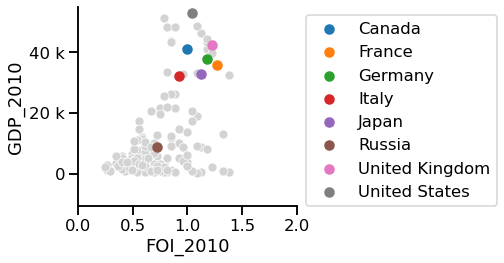

In [12]:
# replication
vis.set_style(context='talk')
vis.plot_correlation(df=df_join.query(f"GDP_{YEAR}<60000").query(f"FOI_{YEAR}<1.5"), 
                     corr=False,
                     y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate, countries=COUNTRIES)

### Sample (3 countries)

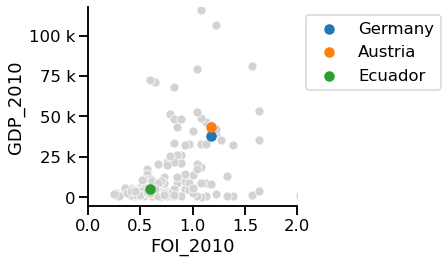

In [13]:
# all countries
vis.set_style(context='talk')
vis.plot_correlation(df=df_join, 
                     corr=False,
                     y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate, countries=COUNTRIES_EXAMPLE)

### Sample (3 rich countries)

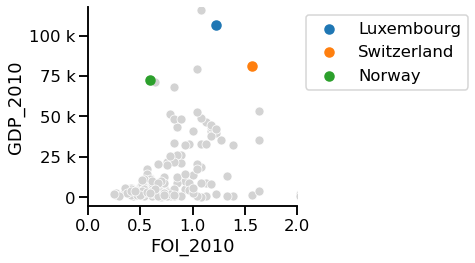

In [14]:
# example 2
vis.set_style(context='talk')
vis.plot_correlation(df=df_join, 
                     corr=False,
                     y=f'GDP_{YEAR}', x=f'FOI_{YEAR}', fnc=vis.annotate, countries=COUNTRIES_EXAMPLE2)